# Visualisation

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2023-11-10

**Abstract**: In this lecture we turn to *unsupervised learning*.
Specifically, we introduce the idea of a latent variable model. Latent
variable models are a probabilistic perspective on unsupervised learning
which lead to dimensionality reduction algorithms.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Setup

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_notebooks/includes/notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used below.

The software can be installed using

In [ ]:
%pip install notutils

from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [ ]:
import notutils

## pods

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/pods-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/pods-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In Sheffield we created a suite of software tools for ‘Open Data
Science’. Open data science is an approach to sharing code, models and
data that should make it easier for companies, health professionals and
scientists to gain access to data science techniques.

You can also check this blog post on [Open Data
Science](http://inverseprobability.com/2014/07/01/open-data-science).

The software can be installed using

In [ ]:
%pip install pods

from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/ods>

Once `pods` is installed, it can be imported in the usual manner.

In [ ]:
import pods

## mlai

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [ ]:
%pip install mlai

from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [ ]:
import mlai

## Review

Last time with generalised linear models we focussed mainly on
regression problems, which are examples of supervised learning. We have
considered the relationship between the likelihood and the objective
function and we have shown how we can find paramters by maximizing the
likelihood (equivalent to minimizing the objective function) and in the
last session we saw how we can *marginalize* the parameters in a process
known as Bayesian inference.

## Clustering

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/clustering.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

-   One common approach, not deeply covered in this course.

-   Associate each data point, $\mathbf{ y}_{i, :}$ with one of $k$
    different discrete groups.

-   For example:

    -   Clustering animals into discrete groups. Are animals discrete or
        continuous?
    -   Clustering into different different *political* affiliations.

-   Humans do seem to like clusters:

    -   Very useful when interacting with biologists.

-   Subtle difference between clustering and *vector quantisation*

-   Little anecdote.

-   To my mind difference is in clustering there should be a reduction
    in data density between samples.

-   This definition is not universally applied.

-   For today’s purposes we merge them:

    -   Determine how to allocate each point to a group and *harder*
        total number of groups.

-   Simple algorithm for allocating points to groups.

-   *Require*: Set of $k$ cluster centres & assignment of each points to
    a cluster.

1.  Initialize cluster centres as randomly selected data points.
    1.  Assign each data point to *nearest* cluster centre.
    2.  Update each cluster centre by setting it to the mean of assigned
        data points.
    3.  Repeat 2 and 3 until cluster allocations do not change.

-   This minimizes the objective $$
    E=\sum_{j=1}^K \sum_{i\ \text{allocated to}\ j}  \left(\mathbf{ y}_{i, :} - \boldsymbol{ \mu}_{j, :}\right)^\top\left(\mathbf{ y}_{i, :} - \boldsymbol{ \mu}_{j, :}\right)
    $$ *i.e.* it minimizes thesum of Euclidean squared distances betwen
    points and their associated centres.
-   The minimum is *not* guaranteed to be *global* or *unique*.
-   This objective is a non-convex optimization problem.

In [ ]:
import mlai
import numpy as np

In [ ]:
def write_plot(counter, caption):
    directory = "./ml"
    filestub = f"kmeans_clustering_{counter:0>3}"
    mlai.write_figure(filestub+".svg", directory=directory)
    f = open(os.path.join(directory,filestub) + '.md', 'w')
    f.write(caption)
    f.close()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
fontsize = 20

num_clust_points = 30

Y = np.vstack([np.random.normal(size=(num_clust_points, 2)) + 2.5,
       np.random.normal(size=(num_clust_points, 2)) - 2.5,
       np.random.normal(size=(num_clust_points, 2)) + np.array([2.5, -2.5])])

centre_inds = np.random.permutation(Y.shape[0])[:3]
centres = Y[centre_inds, :]

ax.cla()

ax.plot(Y[:, 0], Y[:, 1], '.', color=[0, 0, 0], markersize=10)
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_title('Data')
counter=0
write_plot(counter, 'Data set to be analyzed. Initialize cluster centres.')
ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0,0], linewidth=3, markersize=12)    
counter+=1
write_plot(counter, 'Allocate each point to the cluster with the nearest centre')
i = 0

for i in range(6):
    dist_mat = ((Y[:, :, None] - centres.T[None, :, :])**2).sum(1)
    ind = dist_mat.argmin(1)
    ax.cla()
    ax.plot(Y[ind==0, 0], Y[ind==0, 1], 'x', color= [1, 0, 0], markersize=10)
    ax.plot(Y[ind==1, 0], Y[ind==1, 1], 'o', color=[0, 1, 0], markersize=10)
    ax.plot(Y[ind==2, 0], Y[ind==2, 1], '+', color=[0, 0, 1], markersize=10)
    c = ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0, 0], markersize=12, linewidth=3)
    ax.set_xlabel('$y_1$',fontsize=fontsize)
    ax.set_ylabel('$y_2$',fontsize=fontsize)
    ax.set_title('Iteration ' + str(i))
    counter+=1
    write_plot(counter, 'Update each centre by setting to the mean of the allocated points.')
    for j in range(centres.shape[0]):
          centres[j, :] = np.mean(Y[ind==j, :], 0)
    c[0].set_data(centres[:, 0], centres[:, 1])
    counter+=1
    mlai.write_figure(f"kmeans_clustering_{counter:0>3}.svg", directory="./ml")
    write_plot(counter, 'Allocate each data point to the nearest cluster centre.')

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots("kmeans_clustering_{counter:0>3}.svg", directory="./ml", 
                            text_top='kmeans_clustering_{counter:0>3}.tex', counter=(0, 13))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mlai

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

num_centres = 20
num_data = 200
centres = np.random.normal(size=(num_centres, 2))
w = np.random.normal(size=(num_centres, 2))*0.1
alloc = np.random.randint(0, num_centres, size=(num_data))
sigma = np.random.normal(size=(num_centres, 1))*0.05
epsilon = np.random.normal(size=(num_data,2))*sigma[alloc, :]

Y = w[alloc, :]*np.random.normal(size=(num_data, 1)) + centres[alloc, :] + epsilon

ax.plot(Y[:, 0], Y[:, 1], 'rx')
ax.set_xlabel('$y_1$', fontsize=20)
ax.set_ylabel('$y_2$', fontsize=20)

mlai.write_figure("cluster_data00.svg", directory="./ml/")
pi_vals = np.linspace(-np.pi, np.pi, 200)[:, None]
for i in range(num_centres):
    ax.plot(centres[i, 0], centres[i, 1], 'o', markersize=5, color=[0, 0, 0], linewidth=2)
    x = np.hstack([np.sin(pi_vals), np.cos(pi_vals)])
    L = np.linalg.cholesky(np.outer(w[i, :],w[i, :]) + sigma[i]**2*np.eye(2))
    el = np.dot(x, L.T)
    ax.plot(centres[i, 0] + el[:, 0], centres[i, 1] + el[:, 1], linewidth=2, color=[0,0,0])
mlai.write_figure("cluster_data01.svg", directory="./ml/")

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('cluster_data{counter:0>2}.svg', directory='./ml', counter=(0, 1))

Clustering methods associate each data point with a different label.
Unlike in classification the label is not provided by a human annotator.
It is allocated by the computer. Clustering is quite intuitive for
humans, we do it naturally with our observations of the real world. For
example, we cluster animals into different groups. If we encounter a new
animal, we can immediately assign it to a group: bird, mammal, insect.
These are certainly labels that can be provided by humans, but they were
also originally invented by humans. With clustering we want the computer
to recreate that process of inventing the label.

Unsupervised learning enables computers to form similar categorizations
on data that is too large scale for us to process. When the Greek
philosopher, Plato, was thinking about ideas, he considered the concept
of the Platonic ideal. The Platonic ideal bird is the bird that is most
bird-like or the chair that is most chair-like. In some sense, the task
in clustering is to define different clusters, by finding their Platonic
ideal (known as the cluster center) and allocate each data point to the
relevant cluster center. So, allocate each animal to the class defined
by its nearest cluster center.

To perform clustering on a computer we need to define a notion of either
similarity or distance between the objects and their Platonic ideal, the
cluster center. We normally assume that our objects are represented by
vectors of data, $\mathbf{ x}_i$. Similarly, we represent our cluster
center for category $j$ by a vector $\boldsymbol{ \mu}_j$. This vector
contains the ideal features of a bird, a chair, or whatever category $j$
is. In clustering we can either think in terms of similarity of the
objects, or distances. We want objects that are similar to each other to
cluster together. We want objects that are distant from each other to
cluster apart.

This requires us to formalize our notion of similarity or distance.
Let’s focus on distances. A definition of distance between an object,
$i$, and the cluster center of class $j$ is a function of two vectors,
the data point, $\mathbf{ x}_i$ and the cluster center,
$\boldsymbol{ \mu}_j$, $$
d_{ij} = f(\mathbf{ x}_i, \boldsymbol{ \mu}_j).
$$ Our objective is then to find cluster centers that are close to as
many data points as possible. For example, we might want to cluster
customers into their different tastes. We could represent each customer
by the products they’ve purchased in the past. This could be a binary
vector $\mathbf{ x}_i$. We can then define a distance between the
cluster center and the customer.

### Squared Distance

A commonly used distance is the squared distance, $$
d_{ij} = (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2.
$$ The squared distance comes up a lot in machine learning. In
unsupervised learning it was used to measure dissimilarity between
predictions and observed data. Here its being used to measure the
dissimilarity between a cluster center and the data.

Once we have decided on the distance or similarity function, we can
decide a number of cluster centers, $K$. We find their location by
allocating each center to a sub-set of the points and minimizing the sum
of the squared errors, $$
E(\mathbf{M}) = \sum_{i \in \mathbf{i}_j} (\mathbf{ x}_i - \boldsymbol{ \mu}_j)^2
$$ where the notation $\mathbf{i}_j$ represents all the indices of each
data point which has been allocated to the $j$th cluster represented by
the center $\boldsymbol{ \mu}_j$.

### $k$-Means Clustering

One approach to minimizing this objective function is known as
*$k$-means clustering*. It is simple and relatively quick to implement,
but it is an initialization sensitive algorithm. Initialization is the
process of choosing an initial set of parameters before optimization.
For $k$-means clustering you need to choose an initial set of centers.
In $k$-means clustering your final set of clusters is very sensitive to
the initial choice of centers. For more technical details on $k$-means
clustering you can watch a video of Alex Ihler introducing the algorithm
here.

### $k$-Means Clustering

<img src="https://mlatcl.github.io/advds/./slides/diagrams//ml/kmeans-clustering/kmeans_clustering_013.svg" class="" width="\width" style="vertical-align:middle;">

Figure: <i>Clustering with the $k$-means clustering algorithm.</i>

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('mfqmoUN-Cuw')

Figure: <i>$k$-means clustering by Alex Ihler.</i>

### Hierarchical Clustering

Other approaches to clustering involve forming taxonomies of the cluster
centers, like humans apply to animals, to form trees. You can learn more
about agglomerative clustering in this video from Alex Ihler.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('OcoE7JlbXvY')

Figure: <i>Hierarchical Clustering by Alex Ihler.</i>

### Phylogenetic Trees

Indeed, one application of machine learning techniques is performing a
hierarchical clustering based on genetic data, i.e. the actual contents
of the genome. If we do this across a number of species then we can
produce a *phylogeny*. The phylogeny aims to represent the actual
evolution of the species and some phylogenies even estimate the timing
of the common ancestor between two species[1]. Similar methods are used
to estimate the origin of viruses like AIDS or Bird flu which mutate
very quickly. Determining the origin of viruses can be important in
containing or treating outbreaks.

[1] These models are quite a lot more complex than the simple clustering
we describe here. They represent a common ancestor through a cluster
center that is then allowed to evolve over time through a mutation rate.
The time of separation between different species is estimated via these
mutation rates.

### Product Clustering

An e-commerce company could apply hierarchical clustering to all its
products. That would give a phylogeny of products. Each cluster of
products would be split into sub-clusters of products until we got down
to individual products. For example, we might expect a high level split
to be Electronics/Clothing. Of course, a challenge with these tree-like
structures is that many products belong in more than one parent cluster:
for example running shoes should be in more than one group, they are
‘sporting goods’ and they are ‘apparel’. A tree structure doesn’t allow
this allocation.

### Hierarchical Clustering Challenge

Our own psychological grouping capabilities are studied as a domain of
cognitive science. Researchers like Josh Tenenbaum have developed
algorithms that decompose data in more complex ways, but they can
normally only be applied to smaller data sets.

## Other Clustering Approaches

-   Spectral clustering (Shi and Malik (2000),Ng et al. (n.d.))
    -   Allows clusters which aren’t convex hulls.
-   Dirichlet process
    -   A probabilistic formulation for a clustering algorithm that is
        *non-parametric*.
    -   Loosely speaking it allows infinite clusters
    -   In practice useful for dealing with previously unknown species
        (e.g. a “Black Swan Event”).

## High Dimensional Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/high-dimensional-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To introduce high dimensional data, we will first of all introduce a
hand written digit from the U.S. Postal Service handwritten digit data
set (originally collected from scanning enveolopes) and used in the
first convolutional neural network paper (Le Cun et al., 1989).

Le Cun et al. (1989) downscaled the images to $16 \times 16$, here we
use an image at the original scale, containing 64 rows and 57 columns.
Since the pixels are binary, and the number of dimensions is 3,648, this
space contains $2^{3,648}$ possible images. So this space contains a lot
more than just one digit.

## USPS Samples

If we sample from this space, taking each pixel independently from a
probability which is given by the number of pixels which are ‘on’ in the
original image, over the total number of pixels, we see images that look
nothing like the original digit.

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import mlai
import pods

|    Downloading   0.003MB     |
|>|


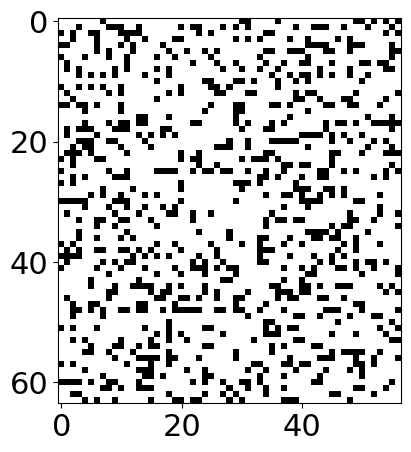

In [84]:
fig, ax = plt.subplots(figsize=(5,5))

pods.access.download_url("https://github.com/lawrennd/slides/raw/gh-pages/diagrams/ml/br1561_6.3.pgm",
                         store_directory="./ml")
six_image = mlai.load_pgm("br1561_6.3.pgm", directory ="./ml")
rows = six_image.shape[0]
col = six_image.shape[1]
      
ax.imshow(six_image,interpolation='none').set_cmap('gray')
mlai.write_figure("dem_six000.png", directory="./dimred/")
for i in range(3):
    rand_image = np.random.rand(rows, col)<((six_image>0).sum()/float(rows*col))
    ax.imshow(rand_image,interpolation='none').set_cmap('gray')
    mlai.write_figure('dem_six{i:0>3}.png'.format(i=i+1), directory="./dimred/")

In [85]:
from ipywidgets import IntSlider
import notutils as nu

In [86]:
nu.display_plots('dem_six{counter:0>3}.png', directory='./dimred', counter=IntSlider(0, 0, 3, 1))

interactive(children=(IntSlider(value=0, description='counter', max=3), Output()), _dom_classes=('widget-inter…

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six000.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Even if we sample every nano second from now until the end of
the universe we won’t see the original six again.</i>

Even if we sample every nanosecond from now until the end of the
universe you won’t see the original six again.

## Simple Model of Digit

So, an independent pixel model for this digit doesn’t seem sensible. The
total space is enormous, and yet the space occupied by the type of data
we’re interested in is relatively small.

Consider a different type of model. One where we take a prototype six
and we rotate it left and right to create new data.

In [87]:
%pip install scikit-image

DEPRECATION: Loading egg at /Users/neil/opt/anaconda3/envs/py311/lib/python3.11/site-packages/pdfannots-0.4-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/neil/opt/anaconda3/envs/py311/lib/python3.11/site-packages/gspread_pandas-3.2.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/neil/opt/anaconda3/envs/py311/lib/python3.11/site-packages/mimesis-11.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/neil/opt/anaconda3/envs/py311/lib/python3.11/site-packages/appscript-1.2.2-py3.11-macosx-11.1-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [88]:
from skimage.transform import rotate

ImportError: dlopen(/Users/neil/opt/anaconda3/envs/py311/lib/python3.11/site-packages/scipy/special/_ufuncs.cpython-311-darwin.so, 0x0002): symbol not found in flat namespace '_npy_asinh'

In [ ]:
six_image = mlai.load_pgm('br1561_6.3.pgm', directory ='./ml')
six_image = np.hstack([np.zeros((rows, 3)), six_image, np.zeros((rows, 4))])
dim_one = np.asarray(six_image.shape)
angles = range(360)
i = 0
Y = np.zeros((len(angles), np.prod(dim_one)))
for angle in angles:
    rot_image = rotate(six_image, angle, mode='nearest')
    dim_two = np.asarray(rot_image.shape)
    start = [int(round((dim_two[0] - dim_one[0])/2)), int(round((dim_two[1] - dim_one[1])/2))]
    crop_image = rot_image[start[0]+np.array(range(dim_one[0])), :][:, start[1]+np.array(range(dim_one[1]))]
    Y[i, :] = crop_image.flatten()

In [89]:
import notutils as nu

In [90]:
nu.display_plots('dem_six_rotate{counter:0>3}.png', directory='./dimred', counter=(0, 6))

interactive(children=(IntSlider(value=3, description='counter', max=6), Output()), _dom_classes=('widget-inter…

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six_rotate001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six_rotate003.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_six_rotate005.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>Rotate a prototype six to form a set of plausible sixes.</i>

<table>
<tr>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_manifold_print001.png" style="width:100%">

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_manifold_print002.png" style="width:100%">

</td>
</tr>
</table>

Figure: <i>The rotated sixes projected onto the first two principal
components of the ‘rotated data set’. The data lives on a one
dimensional manifold in the 3,648 dimensional space.</i>

## Low Dimensional Manifolds

Of course, in practice pure rotation of the image is too simple a model.
Digits can undergo several distortions and retain their nature. For
example, they can be scaled, they can go through translation, they can
udnergo ‘thinning’. But, for data with ‘structure’ we expect fewer of
these distortions than the dimension of the data. This means we expect
data to live on a lower dimensonal manifold. This implies that we should
deal with high dimensional data by looking for a lower dimensional
(non-linear) embedding.

# Latent Variables

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variables.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/latent-variables.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Latent means hidden, and hidden variables are simply *unobservable*
variables. The idea of a latent variable is crucial to the concept of
artificial intelligence, machine learning and experimental design. A
latent variable could take many forms. We might observe a man walking
along a road with a large bag of clothes and we might *infer* that the
man is walking to the laundrette. Our observations are a highly complex
data space, the response in our eyes is processed through our visual
cortex, the combination of the individual’s limb movememnts and the
direction they are walking in all conflate in our heads to cause us to
infer that (perhaps) the individual is going to the laundrette. We don’t
*know* that the man is walking to the laundrette, but we have a model of
the world that suggests that it’s a likely outcome for the very complex
data. In some ways the latent variable can be seen as a *compression* of
this very complex scene. If I were writing a book, I might write that “A
man tripped over whilst walking to the laundrette”. In the reader’s mind
an image of a man, perhaps laden with dirty clothes, may occur. All
these ideas come from our expectations of the world around us. We can
make further inference about the man, some of it perhaps plausible
others less so. The man may be going to the laundrette because his
washing machine is broken, or because he doesn’t have a large enough
flat to have a washing machine, or because he’s carrying a duvet, or
because he doesn’t like ironing. All of these may *increase* in
probability given our observation, but they are still *latent*
variables. Unless we follow the man back to his appartment, or start
making other enquirires about the man, we don’t know the true answer.

It’s clear that to do inference about any complex system we *must*
include latent variables. Latent variables are extremely powerful. In
robotics, they are used to represent the *state* of the robot. The state
of the robot may include its position (in x, y coordinates) its speed,
its direction of facing. How are *these* variables unknown to the robot?
Well the robot only posesses *sensors*, it can make observations of the
nearest object in a certain direction, and it may have a map of its
environment. If we represent the state of the robot as its position on a
map, it may be uncertain of that position. If you go walking or running
in the hills around Sheffield, you can take a very high quality ordnance
survey map with you. However, unless you are a really excellent
orienteer, when you are far from any given landmark, you will probably
be *uncertain* about your true position on the map. These states are
also latent variables.

In statistical analysis of experiments you try to control for each
aspect of the experiment, in particular by *randomization*. So if I’m
interested in the ability of a particular fertilizer to improve the
yield of a particular plant I may design an experiment where I apply the
fertilizer to some plants (the treatment group) and withold the
fertilizer from others (the control group). I then test to see whether
the yield from the treatment group is better (or worse) than the control
group. I may find that I have an excellent yield for the treatment
group. However, what if I’d (unknowlingly) planted all my treatment
plants in a sunny part of the field, and all the control plants in a
shady part of the field. That would also be a latent variable, in this
case known as a *confounder*. In statistical experimental design
*randomization* is used to attempt to eliminate the correlated effects
of these confounders: you aim to ensure that if these confounders *do*
exist their effects are not correlated with treatment and contorl. This
is known as a [randomized control
trial](http://en.wikipedia.org/wiki/Randomized_controlled_trial).

Greek philosophers worried a great deal about what was knowable and what
was unknowable. Adherents of [philosophical
Skeptisism](http://en.wikipedia.org/wiki/Skepticism) were inspired by
the idea that since your senses sometimes give you contradictory
information, they cannot be trusted, and in extreme cases they chose to
*ignore* their senses. This is an acknowledgement that very often the
true state of the world cannot be known with precision. Unfortunately,
these philosophers didn’t have a good understanding of probability, so
they were unable to encapsulate their ideas through a *degree* of
belief.

We often use language to express the compression of a complex behavior
or patterns in a simpler way, for example we talk about motives as a
useful distallation for a perhaps very complex patter of behavior. In
physics we use principles of causation and simple laws to describe the
world around us. Such motives or underlying principles are difficult to
observe directly, our conclusions about them emerge over a period of
time by observing indirect consequences of the latent variables.

Epistemic uncertainty allows us to deal with these worries by
associating our degree of belief about the state of the world with a
probaiblity distribution. This core idea underpins state space
modelling, probabilistic graphical models and the wider field of latent
variable modelling. In this session we are going to explore the idea in
a simple linear system and see how it relates to *factor analysis* and
*principal component analysis*.

# Your Personality

At the beginning of the 20th century there was a great deal of interest
amoungst psychologists in formalizing patterns of thought. The approach
they used became known as factor analysis. The principle is that we
observe a potentially high dimensional vector of characteristics about
an individual. To formalize this, social scientists designed
questionaires. We can envisage many questions that we may ask, but the
assumption is that underlying these questions there are only a few
traits that dictate the behavior. These models are known as latent trait
models and the analysis is sometimes known as factor analysis. The idea
is that there are a few characteristic traits that we are looking to
discern. These traits or factors can be extracted by assimilating the
high dimensional characteristics of the individual into a few latent
factors.

## Factor Analysis Model

This causes us to consider a model as follows, if we are given a high
dimensional vector of features (perhaps questionaire answers) associated
with an individual, $\mathbf{ y}$, we assume that these factors are
actually generated from a low dimensional vector latent traits, or
latent variables, which determine the personality. $$
\mathbf{ y}= \mathbf{f}(\mathbf{ z}) + \boldsymbol{ \epsilon},
$$ where $\mathbf{f}(\mathbf{ z})$ is a *vector valued* function that is
dependent on the latent traits and $\boldsymbol{ \epsilon}$ is some
corrupting noise. For simplicity, we assume that the function is given
by a *linear* relationship, $$
\mathbf{f}(\mathbf{ z}) = \mathbf{W}\mathbf{ z}
$$ where we have introduced a matrix $\mathbf{W}$ that is sometimes
referred to as the *factor loadings* but we also immediately see is
related to our *multivariate linear regression* models from the . That
is because our vector valued function is of the form

$$
\mathbf{f}(\mathbf{ z}) =
\begin{bmatrix} f_1(\mathbf{ z}) \\ f_2(\mathbf{ z}) \\ \vdots \\
f_p(\mathbf{ z})\end{bmatrix}
$$ where there are $p$ features associated with the individual. If we
consider any of these functions individually we have a prediction
function that looks like a regression model, $$
f_j(\mathbf{ z}) =
\mathbf{ w}_{j, :}^\top \mathbf{ z},
$$ for each element of the vector valued function, where
$\mathbf{ w}_{:, j}$ is the $j$th column of the matrix $\mathbf{W}$. In
that context each column of $\mathbf{W}$ is a vector of *regression
weights*. This is a multiple input and multiple output regression. Our
inputs (or covariates) have dimensionality greater than 1 and our
outputs (or response variables) also have dimensionality greater than
one. Just as in a standard regression, we are assuming that we don’t
observe the function directly (note that this *also* makes the function
a *type* of latent variable), but we observe some corrupted variant of
the function, where the corruption is given by $\boldsymbol{ \epsilon}$.
Just as in linear regression we can assume that this corruption is given
by Gaussian noise, where the noise for the $j$th element of
$\mathbf{ y}$ is by, $$
\epsilon_j \sim \mathcal{N}\left(0,\sigma^2_j\right).
$$ Of course, just as in a regression problem we also need to make an
assumption across the individual data points to form our full
likelihood. Our data set now consists of many observations of
$\mathbf{ y}$ for diffetent individuals. We store these observations in
a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$
contains the observation for one individual. To emphasize that
$\mathbf{ y}$ is a vector derived from a row of $\mathbf{Y}$ we
represent the observation of the features associated with the $i$th
individual by $\mathbf{ y}_{i, :}$, and place each individual in our
data matrix,

$$
\mathbf{Y}
= \begin{bmatrix} \mathbf{ y}_{1, :}^\top \\ \mathbf{ y}_{2, :}^\top \\ \vdots \\
\mathbf{ y}_{n, :}^\top\end{bmatrix},
$$ where we have $n$ data points. Our data matrix therefore has $n$ rows
and $p$ columns. The point to notice here is that each data obsesrvation
appears as a row vector in the design matrix (thus the transpose
operation inside the brackets). Our prediction functions are now
actually a *matrix value* function, $$
\mathbf{F} = \mathbf{Z}\mathbf{W}^\top,
$$ where for each matrix the data points are in the rows and the data
features are in the columns. This implies that if we have $q$ inputs to
the function we have $\mathbf{F}\in \Re^{n\times p}$,
$\mathbf{W}\in \Re^{p \times q}$ and $\mathbf{Z}\in \Re^{n\times q}$.

### Exercise 1

Show that, given all the definitions above, if, $$
\mathbf{F} = \mathbf{Z}\mathbf{W}^\top
$$ and the elements of the vector valued function $\mathbf{F}$ are given
by $$
f_{i, j} = f_j(\mathbf{ z}_{i, :}),
$$ where $\mathbf{ z}_{i, :}$ is the $i$th row of the latent variables,
$\mathbf{Z}$, then show that $$
f_j(\mathbf{ z}_{i, :}) = \mathbf{ w}_{j, :}^\top
\mathbf{ z}_{i, :}
$$

### Exercise 1 Answer

Write your answer to Exercise 1 here

## Latent Variables vs Linear Regression

The difference between this model and a multiple output regression is
that in the regression case we are provided with the covariates
$\mathbf{Z}$, here they are *latent variables*. These variables are
unknown. Just as we have done in the past for unknowns, we now treat
them with a probability distribution. In *factor analysis* we assume
that the latent variables have a Gaussian density which is independent
across both across the latent variables associated with the different
data points, and across those associated with different data features,
so we have, $$
x_{i,j} \sim
\mathcal{N}\left(0,1\right),
$$ and we can write the density governing the latent variable associated
with a single point as, $$
\mathbf{ z}_{i, :} \sim \mathcal{N}\left(\mathbf{0},\mathbf{I}\right).
$$ If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} =
\mathbf{f}(\mathbf{ z}_{i, :}) = \mathbf{W}\mathbf{ z}_{i, :} 
$$ then we can use the rules for multivariate Gaussian relationships to
write that $$
\mathbf{f}_{i, :} \sim \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top\right)
$$ which implies that the distribution for $\mathbf{ y}_{i, :}$ is given
by $$
\mathbf{ y}_{i, :} = \sim \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}\right)
$$ where $\boldsymbol{\Sigma}$ the covariance of the noise variable,
$\epsilon_{i, :}$ which for factor analysis is a diagonal matrix
(because we have assumed that the noise was *independent* across the
features), $$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots &
0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$ For completeness, we could also add in a *mean* for the data vector
$\boldsymbol{ \mu}$, $$
\mathbf{ y}_{i, :} = \mathbf{W}\mathbf{ z}_{i, :} +
\boldsymbol{ \mu}+ \boldsymbol{ \epsilon}_{i, :}
$$ which would give our marginal distribution for $\mathbf{ y}_{i, :}$ a
mean $\boldsymbol{ \mu}$. However, the maximum likelihood solution for
$\boldsymbol{ \mu}$ turns out to equal the empirical mean of the data,
$$
\boldsymbol{ \mu}= \frac{1}{n} \sum_{i=1}^n
\mathbf{ y}_{i, :},
$$ *regardless* of the form of the covariance,
$\mathbf{C}= \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a
result it is very common to simply preprocess the data and ensure it is
zero mean. We will follow that convention for this session.

The prior density over latent variables is independent, and the
likelihood is independent, that means that the marginal likelihood here
is also independent over the data points. Factor analysis was developed
mainly in psychology and the social sciences for understanding
personality and intelligence. [Charles
Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned
with the measurements of “the abilities of man” and is credited with the
earliest version of factor analysis.

# Principal Component Analysis

In 1933 [Harold
Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on
*principal component analysis* the first mention of this approach
(Hotelling, 1933). Hotelling’s inspiration was to provide mathematical
foundation for factor analysis methods that were by then widely used
within psychology and the social sciences. His model was a factor
analysis model, but he considered the noiseless ‘limit’ of the model. In
other words he took $\sigma^2_i \rightarrow 0$ so that he had

$$
\mathbf{ y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right).
$$ The paper had two unfortunate effects. Firstly, the resulting model
is no longer valid probablistically, because the covariance of this
Gaussian is ‘degenerate’. Because $\mathbf{W}\mathbf{W}^\top$ has rank
of at most $q$ where $q<p$ (due to the dimensionality reduction) the
determinant of the covariance is zero, meaning the inverse doesn’t exist
so the density, $$
p(\mathbf{ y}_{i, :}|\mathbf{W}) =
\lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2}
|\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|^{\frac{1}{2}}}
\exp\left(-\frac{1}{2}\mathbf{ y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2
\mathbf{I}\right]^{-1}\mathbf{ y}_{i, :}\right),
$$ is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$).
This mathematical consequence is a probability density which has no
‘support’ in large regions of the space for $\mathbf{ y}_{i, :}$. There
are regions for which the probability of $\mathbf{ y}_{i, :}$ is zero.
These are any regions that lie off the hyperplane defined by mapping
from $\mathbf{ z}$ to $\mathbf{ y}$ with the matrix $\mathbf{W}$. In
factor analysis the noise corruption, $\boldsymbol{ \epsilon}$, allows
for points to be found away from the hyperplane. In Hotelling’s PCA the
noise variance is zero, so there is only support for points that fall
precisely on the hyperplane. Secondly, Hotelling explicity chose to
rename factor analysis as principal component analysis, arguing that the
factors social scientist sought were different in nature to the concept
of a mathematical factor. This was unfortunate because the factor
loadings, $\mathbf{W}$ can also be seen as factors in the mathematical
sense because the model Hotelling defined is a Gaussian model with
covariance given by $\mathbf{C}= \mathbf{W}\mathbf{W}^\top$ so
$\mathbf{W}$ is a *factor* of the covariance in the mathematical sense,
as well as a factor loading.

However, the paper had one great advantage over standard approaches to
factor analysis. Despite the fact that the model was a special case that
is subsumed by the more general approach of factor analysis it is this
special case that leads to a particular algorithm, namely that the
factor loadings (or principal components as Hotelling referred to them)
are given by an *eigenvalue decomposition* of the empirical covariance
matrix.

## Computation of the Marginal Likelihood

$$
\mathbf{ y}_{i,:}=\mathbf{W}\mathbf{ z}_{i,:}+\boldsymbol{ \epsilon}_{i,:},\quad \mathbf{ z}_{i,:} \sim \mathcal{N}\left(\mathbf{0},\mathbf{I}\right), \quad \boldsymbol{ \epsilon}_{i,:} \sim \mathcal{N}\left(\mathbf{0},\sigma^{2}\mathbf{I}\right)
$$

$$
\mathbf{W}\mathbf{ z}_{i,:} \sim \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top\right)
$$

$$
\mathbf{W}\mathbf{ z}_{i, :} + \boldsymbol{ \epsilon}_{i, :} \sim \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$

**Probabilistic PCA Max. Likelihood Soln** (Tipping and Bishop (1999a))

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/ppca_graph.png" style="width:40%">

Figure: <i>Graphical model representing probabilistic PCA.</i>

$$p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{ y}_{i, :}|\mathbf{0},\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)$$

## Eigenvalue Decomposition

Eigenvalue problems are widespreads in physics and mathematics, they are
often written as a matrix/vector equation but we prefer to write them as
a full matrix equation. In an eigenvalue problem you are looking to find
a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of
eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}.
$$ where $\mathbf{A}$ is your matrix of interest. This equation is not
trivially solvable through matrix inverse because matrix multiplication
is not [commutative](http://en.wikipedia.org/wiki/Commutative_property),
so premultiplying by $\mathbf{U}^{-1}$ gives $$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U}
= \boldsymbol{\Lambda}, 
$$ where we remember that $\boldsymbol{\Lambda}$ is a *diagonal* matrix,
so the eigenvectors can be used to *diagonalise* the matrix. When
performing the eigendecomposition on a Gaussian covariances,
diagonalisation is very important because it returns the covariance to a
form where there is no correlation between points.

## Positive Definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix,
which implies it is *positive definite*. A positive definite matrix is
one for which the inner product, $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}
$$ is positive for *all* values of the vector $\mathbf{ w}$ other than
the zero vector. One way of creating a positive definite matrix is to
assume that the symmetric and positive definite matrix
$\mathbf{C}\in \Re^{p\times p}$ is factorised into,
$\mathbf{A}in \Re^{p\times p}$, a *full rank* matrix, so that $$
\mathbf{C}= \mathbf{A}^\top
\mathbf{A}.
$$ This ensures that $\mathbf{C}$ must be positive definite because $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}=\mathbf{ w}^\top
\mathbf{A}^\top\mathbf{A}\mathbf{ w}
$$ and if we now define a new *vector* $\mathbf{b}$ as $$
\mathbf{b} = \mathbf{A}\mathbf{ w}
$$ we can now rewrite as $$
\mathbf{ w}^\top \mathbf{C}\mathbf{ w}= \mathbf{b}^\top\mathbf{b} = \sum_{i}
b_i^2
$$ which, since it is a sum of squares, is positive or zero. The
constraint that $\mathbf{A}$ must be *full rank* ensures that there is
no vector $\mathbf{ w}$, other than the zero vector, which causes the
vector $\mathbf{b}$ to be all zeros.

### Exercise 2

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the
value of the element at the $i$th row and the $j$th column of
$\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show
that (i) the matrix is symmetric and (ii) the matrix has positive
elements along its diagonal.

### Exercise 2 Answer

Write your answer to Exercise 2 here

## Eigenvectors of a Symmetric Matric

Symmetric matrices have *orthonormal* eigenvectors. This means that
$\mathbf{U}$ is an [orthogonal
matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix),
$\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that
$\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$
and 1 if $i=j$.

## Principal Component Analysis

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/principal-component-analysis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/principal-component-analysis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

-   PCA (Hotelling (1933)) is a linear embedding.

-   Today its presented as:

    -   Rotate to find ‘directions’ in data with maximal variance.
    -   How do we find these directions?

-   Algorithmically we do this by diagonalizing the sample covariance
    matrix $$
    \mathbf{S}=\frac{1}{n}\sum_{i=1}^n\left(\mathbf{ y}_{i, :}-\boldsymbol{ \mu}\right)\left(\mathbf{ y}_{i, :} - \boldsymbol{ \mu}\right)^\top
    $$

-   Find directions in the data, $\mathbf{ z}= \mathbf{U}\mathbf{ y}$,
    for which variance is maximized.

-   Solution is found via constrained optimisation (which uses [Lagrange
    multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier)): $$
    L\left(\mathbf{u}_{1},\lambda_{1}\right)=\mathbf{u}_{1}^{\top}\mathbf{S}\mathbf{u}_{1}+\lambda_{1}\left(1-\mathbf{u}_{1}^{\top}\mathbf{u}_{1}\right)
    $$

-   Gradient with respect to $\mathbf{u}_{1}$
    $$\frac{\text{d}L\left(\mathbf{u}_{1},\lambda_{1}\right)}{\text{d}\mathbf{u}_{1}}=2\mathbf{S}\mathbf{u}_{1}-2\lambda_{1}\mathbf{u}_{1}$$
    rearrange to form
    $$\mathbf{S}\mathbf{u}_{1}=\lambda_{1}\mathbf{u}_{1}.$$ Which is
    known as an [*eigenvalue
    problem*](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).

-   Further directions that are *orthogonal* to the first can also be
    shown to be eigenvectors of the covariance.

-   Represent data, $\mathbf{Y}$, with a lower dimensional set of latent
    variables $\mathbf{Z}$.

-   Assume a linear relationship of the form $$
    \mathbf{ y}_{i,:}=\mathbf{W}\mathbf{ z}_{i,:}+\boldsymbol{ \epsilon}_{i,:},
    $$ where $$
    \boldsymbol{ \epsilon}_{i,:} \sim \mathcal{N}\left(\mathbf{0},\sigma^2\mathbf{I}\right)
    $$

**Probabilistic PCA**

<table>
<tr>
<td width>

-   Define *linear-Gaussian relationship* between latent variables and
    data.
-   **Standard** Latent variable approach:
    -   Define Gaussian prior over *latent space*, $\mathbf{Z}$.
-   Integrate out *latent variables*. `{=html}     </td>`
    `{=html}     <td width="">`

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/ppca_graph.png" style="width:40%">

Figure: <i>Graphical model representing probabilistic PCA.</i>

$$
p\left(\mathbf{Y}|\mathbf{Z},\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{ y}_{i,:}|\mathbf{W}\mathbf{ z}_{i,:},\sigma^2\mathbf{I}\right)
$$

$$
p\left(\mathbf{Z}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{ z}_{i,:}|\mathbf{0},\mathbf{I}\right)
$$

$$
p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{ y}_{i,:}|\mathbf{0},\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)
$$

</td>
</tr>
</table>

# Probabilistic PCA

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/probabilistic-pca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/probabilistic-pca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In 1997 [Tipping and
Bishop](http://research.microsoft.com/pubs/67218/bishop-ppca-jrss.pdf)
(Tipping and Bishop, 1999b) and
[Roweis](https://www.cs.nyu.edu/~roweis/papers/empca.pdf) (Roweis, n.d.)
independently revisited Hotelling’s model and considered the case where
the noise variance was finite, but *shared* across all output dimensons.
Their model can be thought of as a factor analysis where $$
\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}.
$$ This leads to a marginal likelihood of the form $$
p(\mathbf{Y}|\mathbf{W}, \sigma^2)
= \prod_{i=1}^n\mathcal{N}\left(\mathbf{ y}_{i, :}|\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$ where the limit of $\sigma^2\rightarrow 0$ is *not* taken. This
defines a proper probabilistic model. Tippping and Bishop then went on
to prove that the *maximum likelihood* solution of this model with
respect to $\mathbf{W}$ is given by an eigenvalue problem. In the
probabilistic PCA case the eigenvalues and eigenvectors are given as
follows. $$
\mathbf{W}= \mathbf{U}\mathbf{L} \mathbf{R}^\top
$$ where $\mathbf{U}$ is the eigenvectors of the empirical covariance
matrix $$
\mathbf{S} = \sum_{i=1}^n(\mathbf{ y}_{i, :} - \boldsymbol{ \mu})(\mathbf{ y}_{i,
:} - \boldsymbol{ \mu})^\top,
$$ which can be written
$\mathbf{S} = \frac{1}{n} \mathbf{Y}^\top\mathbf{Y}$ if the data is zero
mean. The matrix $\mathbf{L}$ is diagonal and is dependent on the
*eigenvalues* of $\mathbf{S}$, $\boldsymbol{\Lambda}$. If the $i$th
diagonal element of this matrix is given by $\lambda_i$ then the
corresponding element of $\mathbf{L}$ is $$
\ell_i = \sqrt{\lambda_i - \sigma^2}
$$ where $\sigma^2$ is the noise variance. Note that if $\sigma^2$ is
larger than any particular eigenvalue, then that eigenvalue (along with
its corresponding eigenvector) is *discarded* from the solution.

## Python Implementation of Probabilistic PCA

We will now implement this algorithm in python.

In [94]:
import numpy as np

In [95]:
# probabilistic PCA algorithm
def ppca(Y, q):
    # remove mean
    Y_cent = Y - Y.mean(0)

    # Comute covariance
    S = np.dot(Y_cent.T, Y_cent)/Y.shape[0]
    lambd, U = np.linalg.eig(S)

    # Choose number of eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    l = np.sqrt(lambd[:q]-sigma2)
    W = U[:, :q]*l[None, :]
    return W, sigma2

In practice we may not wish to compute the eigenvectors of the
covariance matrix directly. This is because it requires us to estimate
the covariance, which involves a sum of squares term, before estimating
the eigenvectors. We can estimate the eigenvectors directly either
through [QR
decomposition](http://en.wikipedia.org/wiki/QR_decomposition) or
[singular value
decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition).
We saw a similar issue arise when , where we also wished to avoid
computation of $\mathbf{Z}^\top\mathbf{Z}$ (or in the case of
$\boldsymbol{\Phi}^\top\boldsymbol{\Phi}$).

# Posterior for Principal Component Analysis

Under the latent variable model justification for principal component
analysis, we are normally interested in inferring something about the
latent variables given the data. This is the distribution, $$
p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :})
$$ for any given data point. Determining this density turns out to be
very similar to the approach for determining the Bayesian posterior of
$\mathbf{ w}$ in Bayesian linear regression, only this time we place the
prior density over $\mathbf{ z}_{i, :}$ instead of $\mathbf{ w}$. The
posterior is proportional to the joint density as follows, $$
p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) \propto p(\mathbf{ y}_{i,
:}|\mathbf{W}, \mathbf{ z}_{i, :}, \sigma^2) p(\mathbf{ z}_{i, :})
$$ And as in the Bayesian linear regression case we first consider the
log posterior, $$
\log p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) = \log p(\mathbf{ y}_{i, :}|\mathbf{W},
\mathbf{ z}_{i, :}, \sigma^2) + \log p(\mathbf{ z}_{i, :}) + \text{const}
$$ where the constant is not dependent on $\mathbf{ z}$. As before we
collect the quadratic terms in $\mathbf{ z}_{i, :}$ and we assemble them
into a Gaussian density over $\mathbf{ z}$. $$
\log p(\mathbf{ z}_{i, :} | \mathbf{ y}_{i, :}) =
-\frac{1}{2\sigma^2} (\mathbf{ y}_{i, :} - \mathbf{W}\mathbf{ z}_{i,
:})^\top(\mathbf{ y}_{i, :} - \mathbf{W}\mathbf{ z}_{i, :}) - \frac{1}{2}
\mathbf{ z}_{i, :}^\top \mathbf{ z}_{i, :} + \text{const}
$$

### Exercise 3

Multiply out the terms in the brackets. Then collect the quadratic term
and the linear terms together. Show that the posterior has the form $$
\mathbf{ z}_{i, :} | \mathbf{W}\sim \mathcal{N}\left(\boldsymbol{ \mu}_x,\mathbf{C}_x\right)
$$ where $$
\mathbf{C}_x = \left(\sigma^{-2}
\mathbf{W}^\top\mathbf{W}+ \mathbf{I}\right)^{-1}
$$ and $$
\boldsymbol{ \mu}_x
= \mathbf{C}_x \sigma^{-2}\mathbf{W}^\top \mathbf{ y}_{i, :} 
$$ Compare this to the posterior for the Bayesian linear regression from
last week, do they have similar forms? What matches and what differs?

### Exercise 3 Answer

Write your answer to Exercise 3 here

## Python Implementation of the Posterior

Now let’s implement the system in code.

### Exercise 4

Use the values for $\mathbf{W}$ and $\sigma^2$ you have computed, along
with the data set $\mathbf{Y}$ to compute the posterior density over
$\mathbf{Z}$. Write a function of the form

``` python
mu_x, C_x = posterior(Y, W, sigma2)
```

where `mu_x` and `C_x` are the posterior mean and posterior covariance
for the given $\mathbf{Y}$.

Don’t forget to subtract the mean of the data `Y` inside your function
before computing the posterior: remember we assumed at the beginning of
our analysis that the data had been centred (i.e. the mean was removed).

In [96]:
# Write your answer to Exercise 4 here


# Answer Code
# Write code for you answer to this exercise in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
import numpy as np
import scipy as sp
def posterior(Y, W, sigma2):
    Y_cent = Y - Y.mean(0)
    # Compute posterior over X
    C_x = 
    mu_x = 
    return mu_x, C_x



SyntaxError: invalid syntax (2985527837.py, line 13)

## Numerically Stable and Efficient Version

Just as we saw for and computation of a matrix such as
$\mathbf{Y}^\top\mathbf{Y}$ (or its centred version) can be a bad idea
in terms of loss of numerical accuracy. Fortunately, we can find the
eigenvalues and eigenvectors of the matrix $\mathbf{Y}^\top\mathbf{Y}$
without direct computation of the matrix. This can be done with the
[*singular value
decomposition*](http://en.wikipedia.org/wiki/Singular_value_decomposition).
The singular value decompsition takes a matrix, $\mathbf{Z}$ and
represents it in the form, $$
\mathbf{Z} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top
$$ where $\mathbf{U}$ is a matrix of orthogonal vectors in the columns,
meaning $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. It has the same number
of rows and columns as $\mathbf{Z}$. The matrices $\mathbf{\Lambda}$ and
$\mathbf{V}$ are both square with dimensionality given by the number of
columns of $\mathbf{Z}$. The matrix $\mathbf{\Lambda}$ is *diagonal* and
$\mathbf{V}$ is an orthogonal matrix so
$\mathbf{V}^\top\mathbf{V} = \mathbf{V}\mathbf{V}^\top = \mathbf{I}$.
The eigenvalues of the matrix $\mathbf{Y}^\top\mathbf{Y}$ are then given
by the singular values of the matrix $\mathbf{Y}^\top$ squared and the
eigenvectors are given by $\mathbf{U}$.

## Solution for $\mathbf{W}$

Given the singular value decomposition of $\mathbf{Y}$ then we have $$
\mathbf{W}=
\mathbf{U}\mathbf{L}\mathbf{R}^\top
$$ where $\mathbf{R}$ is an arbitrary rotation matrix. This implies that
the posterior is given by $$
\mathbf{C}_x =
\left[\sigma^{-2}\mathbf{R}\mathbf{L}^2\mathbf{R}^\top + \mathbf{I}\right]^{-1}
$$ because $\mathbf{U}^\top \mathbf{U} = \mathbf{I}$. Since, by
convention, we normally take $\mathbf{R} = \mathbf{I}$ to ensure that
the principal components are orthonormal we can write $$
\mathbf{C}_x = \left[\sigma^{-2}\mathbf{L}^2 +
\mathbf{I}\right]^{-1}
$$ which implies that $\mathbf{C}_x$ is actually diagonal with elements
given by $$
c_i = \frac{\sigma^2}{\sigma^2 + \ell^2_i}
$$ and allows us to write $$
\boldsymbol{ \mu}_x = [\mathbf{L}^2 + \sigma^2
\mathbf{I}]^{-1} \mathbf{L} \mathbf{U}^\top \mathbf{ y}_{i, :}
$$ $$
\boldsymbol{ \mu}_x = \mathbf{D}\mathbf{U}^\top \mathbf{ y}_{i, :}
$$ where $\mathbf{D}$ is a diagonal matrix with diagonal elements given
by $d_{i} = \frac{\ell_i}{\sigma^2 + \ell_i^2}$.

In [97]:
import scipy as sp
import numpy as np

In [98]:
# probabilistic PCA algorithm using SVD
def ppca(Y, q, center=True):
    """Probabilistic PCA through singular value decomposition"""
    # remove mean
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y
        
    # Comute singluar values, discard 'R' as we will assume orthogonal
    U, sqlambd, _ = sp.linalg.svd(Y_cent.T,full_matrices=False)
    lambd = (sqlambd**2)/Y.shape[0]
    # Compute residual and extract eigenvectors
    sigma2 = np.sum(lambd[q:])/(Y.shape[1]-q)
    ell = np.sqrt(lambd[:q]-sigma2)
    return U[:, :q], ell, sigma2

def posterior(Y, U, ell, sigma2, center=True):
    """Posterior computation for the latent variables given the eigendecomposition."""
    if center:
        Y_cent = Y - Y.mean(0)
    else:
        Y_cent = Y
    C_x = np.diag(sigma2/(sigma2+ell**2))
    d = ell/(sigma2+ell**2)
    mu_x = np.dot(Y_cent, U)*d[None, :]
    return mu_x, C_x

## Examples: Motion Capture Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/mocap-ppca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/mocap-ppca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

For our first example we’ll consider some motion capture data of a man
breaking into a run. [Motion capture
data](http://en.wikipedia.org/wiki/Motion_capture) involves capturing a
3-d point cloud to represent a character, often by an underlying
skeleton. For this data set, from Ohio State University, we have 54
frame of motion capture, each frame containing 102 values, which are the
3-d locations of 34 different points from the subject’s skeleton.

In [99]:
import pods

In [100]:
data = pods.datasets.osu_run1()
Y = data['Y']

Once the data is loaded in we can examine the first two principal
components as follows,

In [101]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

In [102]:
import matplotlib.pyplot as plt
import mlai

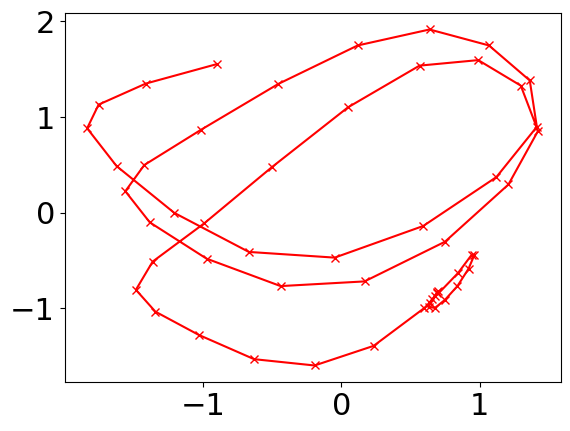

In [103]:
plt.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')
mlai.write_figure("dem_osu_run1.svg", directory="./dimred/")

<img src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_osu_run1.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>First two principle components of motion capture data of an
individual running.</i>

Here because the data is a time course, we have connected points that
are neighbouring in time. This highlights the form of the run, which
involves 3 paces. This projects in our low dimensional space to 3 loops.
We can examin how much residual variance there is in the system by
looking at `sigma2`.

In [104]:
print(sigma2)

0.023977616979527206


## Robot Navigation Example

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/robot-wireless-ppca.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/robot-wireless-ppca.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the next example we will load in data from a robot navigation
problem. The data consists of wireless access point strengths as
recorded by a robot performing a loop around the University of
Washington’s Computer Science department in Seattle. The robot records
all the wireless access points it can cache and stores their signal
strength.

In [105]:
import pods

In [106]:
data = pods.datasets.robot_wireless()
Y = data['Y']
Y.shape

(215, 30)

There are 215 observations of 30 different access points. In this case
the model is suggesting that the access point signal strength should be
linearly dependent on the location in the map. In other words we are
expecting the access point strength for the $j$th access point at robot
position $x_{i, :}$ to be represented by
$y_{i, j} = \mathbf{ w}_{j, :}^\top \mathbf{ z}_{i, :} + \epsilon_{i,j}$.

In [107]:
import matplotlib.pyplot as plt
import mlai

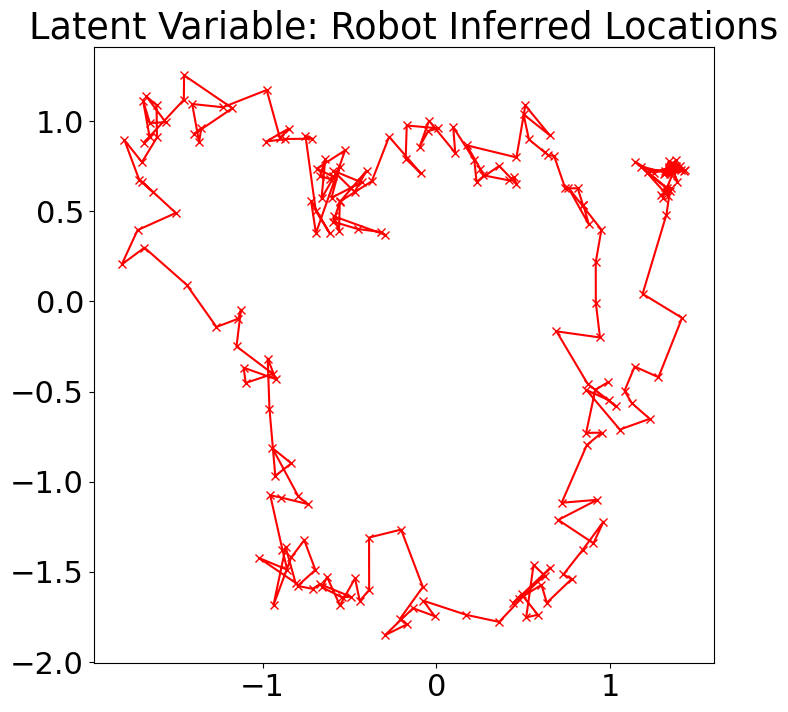

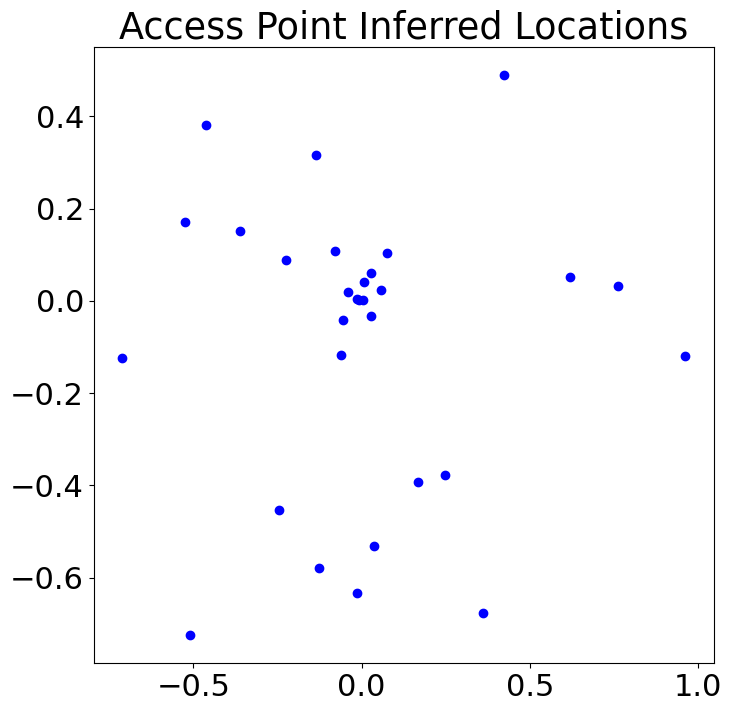

In [108]:
q = 2
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(mu_x[:, 0], mu_x[:, 1], 'rx-')
ax.set_title('Latent Variable: Robot Inferred Locations')
fig, ax = plt.subplots(figsize=(8,8))
W = U*ell[None, :]
ax.plot(W[:, 0], W[:, 1], 'bo')
ax.set_title('Access Point Inferred Locations')
mlai.write_figure("dem_robot_wireless_pca.svg", directory="dimred")

In [109]:
U, ell, sigma2 = ppca(Y.T, q)

# Interpretations of Principal Component Analysis

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-interpretations.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-interpretations.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

## Relationship to Matrix Factorization

We can use the robot naviation example to realise that PCA (and factor
analysis) are very reminiscient of the that we used for introducing
objective functions. In that system we used slightly different notation,
$\mathbf{u}_{i, :}$ for *user* location in our metaphorical library and
$\mathbf{v}_{j, :}$ for *item* location in our metaphorical library. To
see how these systems are somewhat analagous, now let us think about the
user as the robot and the items as the wifi access points. We can plot
the relative location of both. This process is known as “SLAM”:
simultaneous *localisation* and *mapping*. A latent variable model of
the type we have developed is one way of performing SLAM. We have an
estimate of the *landmarks* in the system (in this case WIFI access
points) and we have an estimate of the robot position. These are
analagous to the estimate of the user’s position and the estimate of the
items positions in the library. In the matrix factorisation example
users are informing us what items they are ‘close’ to by expressing
their preferences, in the robot localization example the robot is
informing us what access point it is close to by measuring signal
strength.

From a personal perspective, I find this analogy quite comforting. I
think it is very arguable that one of the mechanisms through which we
(as humans) may have developed higher reasoning is through the need to
navigate around our environment, identifying landmarks and associating
them with our search for food. If such a system were to exist, the idea
that it could be readily adapted to other domains such as categorising
the nature of the different foodstuffs we were able to forage is
intriguing.

From an algorithmic perspective, we also can now realise that matrix
factorization and latent variable modelling are effectively the same
thing. The only difference is the objective function and our
probabilistic (or lack of probabilistic) treatment of the variables. But
the prediction function for both systems, $$
f_{i, j} =
\mathbf{u}_{i, :}^\top \mathbf{v}_{j, :} 
$$ for matrix factorization or $$
f_{i, j} = \mathbf{ z}_{i, :}^\top \mathbf{ w}_{j, :} 
$$ for probabilistic PCA and factor analysis are the same.

## Other Interpretations of PCA: Separating Model and Algorithm

Since Hotelling first introduced his perspective on factor analysis as
PCA there has been somewhat of a conflation of the idea of the model
underlying PCA (for which it was very clear that Hotelling was inspired
by Factor Analysis) and the algorithm that is used to fit that model:
the eigenvalues and eigenvectors of the covariance matrix. The
eigenvectors of an ellipsoid have been known since the middle of the
19th century as the principal axes of the elipsoid, and they arise
through the following additional ideas: seeking the orthogonal
directions of *maximum variance* in a dataset. Pearson in 1901 arrived
at the same algorithm driven by a desire to seek a *symmetric
regression* between two covariate/response variables $x$ and $y$
(Pearson, 1901). He is, therefore, often credited with the invention of
principal component analysis, but to me this seems disengenous. His aim
was very different from Hotellings, it was just happened that the
optimal solution for his model was coincident with that of Hotelling.
The approach is also known as the [Karhunen Loeve
Transform](http://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem)
in stochastic process theory and in classical multidimensional scaling
the same operation can be shown to be minimising a particular objective
function based on interpoint distances in the data and the latent space
(see the section on Classical Multidimensional Scaling in [Mardia, Kent
and
Bibby](http://store.elsevier.com/Multivariate-Analysis/Kanti-%20Mardia/isbn-9780124712522/))
(Mardia et al., 1979). One of my own contributions to machine learning
was deriving yet another model whose linear variant was solved by
finding the principal subspace of the covariance matrix (an approach I
termed dual probabilistic PCA or probabilistic principal coordinate
analysis). Finally, the approach is sometimes referred to simply as
singular value decomposition (SVD). The singular value decomposition of
a data set has the following form, $$
\mathbf{Y}= \mathbf{V} \boldsymbol{\Lambda} \mathbf{U}^\top
$$ where $\mathbf{V}\in\Re^{n\times n}$ and
$\mathbf{U}^\in \Re^{p\times p}$ are square orthogonal matrices and
$\mathbf{\Lambda}^{n \times p}$ is zero apart from its first $p$
diagonal entries. Singularvalue decomposition gives a diagonalisation of
the covariance matrix, because under the SVD we have $$
\mathbf{Y}^\top\mathbf{Y}=
\mathbf{U}\boldsymbol{\Lambda}\mathbf{V}^\top\mathbf{V} \boldsymbol{\Lambda}
\mathbf{U}^\top = \mathbf{U}\boldsymbol{\Lambda}^2 \mathbf{U}^\top
$$ where $\boldsymbol{\Lambda}^2$ is now the eigenvalues of the
covariane matrix and $\mathbf{U}$ are the eigenvectors. So performing
the SVD can simply be seen as another approach to determining the
principal components.

## Separating Model and Algorithm

I’ve given a fair amount of personal thought to this situation and my
own opinion that this confusion about method arises because of a
conflation of model and algorithm. The model of Hotelling, that which he
termed principal component analysis, was really a variant of factor
analysis, and it was unfortunate that he chose to rename it. However,
the algorithm he derived was a very convenient way of optimising a
(simplified) factor analysis, and it’s therefore become very popular.
The algorithm is also the optimal solution for many other models of the
data, even some which might seem initally to be unrelated (e.g. seeking
directions of maximum variance). It is only through the mathematics of
this linear system (which also contains some intersting symmetries) that
all these ides become related. However, as soon as we choose to
non-linearise the system (e.g. through basis functions) we find that
each of the non-linear intepretations we can derive for the different
models each leads to a very different algorithm (if such an algorithm is
possible). For example [principal
curves](http://web.stanford.edu/~hastie/Papers/Principal_Curves.pdf) of
Hastie and Stuetzle (1989) attempt to non-linearise the maximum variance
interpretation, [kernel
PCA](http://en.wikipedia.org/wiki/Kernel_principal_component_analysis)
of Schölkopf et al. (1998) uses basis functions to form the eigenvalue
problem in a nonlinear space, and my own work in this area
[non-linearises the dual probabilistic
PCA](http://jmlr.org/papers/volume6/lawrence05a/lawrence05a.pdf)
(Lawrence, 2005).

My conclusion is that when you are doing machine learning you should
always have it clear in your mind what your *model* is and what your
*algorithm* is. You can recognise your model because it normally
contains a prediction function and an objective function. The algorithm
on the other hand is the sequence of steps you implement on the computer
to solve for the parameters of this model. For efficient implementation,
we often modify our model to allow for faster algorithms, and this is a
perfectly valid pragmatist’s approach, so conflation of model and
algorithm is not always a bad thing. But for clarity of thinking and
understanding it is necessary to maintain the separation and to maintain
a handle on when and why we perform the conflation.

# PCA in Practice

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-in-practice.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-in-practice.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Principal component analysis is so effective in practice that there has
almost developed a mini-industry in renaming the method itself (which is
ironic, given its origin). In particular [Latent Semantic
Indexing](http://en.wikipedia.org/wiki/Latent_semantic_indexing) in text
processing is simply PCA on a particular representation of the term
frequencies of the document. There is a particular fad to rename the
eigenvectors after the nature of the data you are examining, perhaps
initially triggered by [Turk and
Pentland’s](http://www.face-rec.org/algorithms/PCA/jcn.pdf) paper on
eigenfaces, but also with
[eigenvoices](https://wiki.inf.ed.ac.uk/twiki/pub/CSTR/ListenSemester1_2007_8/kuhn-%20junqua-eigenvoice-icslp1998.pdf)
and [eigengenes](http://www.biomedcentral.com/1752-0509/1/54). This
seems to be an instantiation of a wider, and hopefully subconcious,
tendency in academia to attempt to differentiate one idea from the same
idea in related fields in order to emphasise the novelty. The
unfortunate result is somewhat of a confusing literature for relatively
simple model. My recommendations would be as follows. If you have
multivariate data, applying some form of principal component would seem
to be a very good idea as a first step. Even if you intend to later
perform classification or regression on your data, it can give you
understanding of the structure of the underlying data and help you to
develop your intuitions about the nature of your data. Intelligent
plotting and interaction with your data is always a good think, and for
high dimensional data that means that you need some way of
visualisation, PCA is typically a good starting point.

# PPCA Marginal Likelihood

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-marginal-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-marginal-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have developed the posterior density over the latent variables given
the data and the parameters, and due to symmetries in the underlying
prediction function, it has a very similar form to its sister density,
the posterior of the weights given the data from Bayesian regression.
Two key differences are as follows. If we were to do a Bayesian multiple
output regression we would find that the marginal likelihood of the data
is independent across the features and correlated across the data, $$
p(\mathbf{Y}|\mathbf{Z})
= \prod_{j=1}^p \mathcal{N}\left(\mathbf{ y}_{:, j}|\mathbf{0},
\alpha\mathbf{Z}\mathbf{Z}^\top + \sigma^2 \mathbf{I}\right)
$$ where $\mathbf{ y}_{:, j}$ is a column of the data matrix and the
independence is across the *features*, in probabilistic PCA the marginal
likelihood has the form, $$
p(\mathbf{Y}|\mathbf{W}) = \prod_{i=1}^n\mathcal{N}\left(\mathbf{ y}_{i,
:}|\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)
$$ where $\mathbf{ y}_{i, :}$ is a row of the data matrix $\mathbf{Y}$
and the independence is across the data points.

# Computation of the Log Likelihood

The quality of the model can be assessed using the log likelihood of
this Gaussian form. $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \log \left|
\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right| -\frac{1}{2}
\sum_{i=1}^n\mathbf{ y}_{i, :}^\top \left(\mathbf{W}\mathbf{W}^\top + \sigma^2
\mathbf{I}\right)^{-1} \mathbf{ y}_{i, :} +\text{const}
$$ but this can be computed more rapidly by exploiting the low rank form
of the covariance covariance,
$\mathbf{C}= \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}$ and the
fact that $\mathbf{W}= \mathbf{U}\mathbf{L}\mathbf{R}^\top$.
Specifically, we first use the decomposition of $\mathbf{W}$ to write:
$$
-\frac{n}{2} \log \left| \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right|
= -\frac{n}{2} \sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log
\sigma^2,
$$ where $\ell_i$ is the $i$th diagonal element of $\mathbf{L}$. Next,
we use the [Woodbury matrix
identity](http://en.wikipedia.org/wiki/Woodbury_matrix_identity) which
allows us to write the inverse as a quantity which contains another
inverse in a smaller matrix: $$
(\sigma^2 \mathbf{I}+ \mathbf{W}\mathbf{W}^\top)^{-1} =
\sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W}{\underbrace{(\mathbf{I}+\sigma^{-2}\mathbf{W}^\top\mathbf{W})}_{\mathbf{C}_x}}^{-1}\mathbf{W}^\top
$$ So, it turns out that the original inversion of the $p \times p$
matrix can be done by forming a quantity which contains the inversion of
a $q \times q$ matrix which, moreover, turns out to be the quantity
$\mathbf{C}_x$ of the posterior.

Now, we put everything together to obtain: $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2} \sum_{i=1}^q
\log (\ell_i^2 + \sigma^2)
- \frac{n(p-q)}{2}\log \sigma^2 - \frac{1}{2} \text{tr}\left(\mathbf{Y}^\top \left(
\sigma^{-2}\mathbf{I}-\sigma^{-4}\mathbf{W}\mathbf{C}_x
\mathbf{W}^\top \right) \mathbf{Y}\right) + \text{const},
$$ where we used the fact that a scalar sum can be written as
$\sum_{i=1}^n\mathbf{ y}_{i,:}^\top \mathbf{K}\mathbf{ y}_{i,:} = \text{tr}\left(\mathbf{Y}^\top \mathbf{K}\mathbf{Y}\right)$,
for any matrix $\mathbf{K}$ of appropriate dimensions. We now use the
properties of the trace
$\text{tr}\left(\mathbf{A}+\mathbf{B}\right)=\text{tr}\left(\mathbf{A}\right)+\text{tr}\left(\mathbf{B}\right)$
and
$\text{tr}\left(c \mathbf{A}\right) = c \text{tr}\left(\mathbf{A}\right)$,
where $c$ is a scalar and $\mathbf{A},\mathbf{B}$ matrices of compatible
sizes. Therefore, the final log likelihood takes the form: $$
\log p(\mathbf{Y}|\mathbf{W}) = -\frac{n}{2}
\sum_{i=1}^q \log (\ell_i^2 + \sigma^2) - \frac{n(p-q)}{2}\log \sigma^2 -
\frac{\sigma^{-2}}{2} \text{tr}\left(\mathbf{Y}^\top \mathbf{Y}\right)
+\frac{\sigma^{-4}}{2} \text{tr}\left(\mathbf{B}\mathbf{C}_x\mathbf{B}^\top\right) +
\text{const}
$$ where we also defined $\mathbf{B}=\mathbf{Y}^\top\mathbf{W}$.
Finally, notice that
$\text{tr}\left(\mathbf{Y}\mathbf{Y}^\top\right)=\text{tr}\left(\mathbf{Y}^\top\mathbf{Y}\right)$
can be computed faster as the sum of all the elements of
$\mathbf{Y}\circ\mathbf{Y}$, where $\circ$ denotes the element-wise (or
[Hadamard](http://en.wikipedia.org/wiki/Hadamard_product_(matrices)))
product.

## Reconstruction of the Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-reconstruction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/ppca-reconstruction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Given any posterior projection of a data point, we can replot the
original data as a function of the input space.

We will now try to reconstruct the motion capture figure form some
different places in the latent plot.

### Exercise 5

Project the motion capture data onto its principal components, and then
use the *mean posterior estimate* to reconstruct the data from the
latent variables at the data points. Use two latent dimensions. What is
the sum of squares error for the reconstruction?

### Exercise 5 Answer

Write your answer to Exercise 5 here

## Other Data Sets to Explore

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-other-data-sets.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/pca-other-data-sets.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Below there are a few other data sets from `pods` you might want to
explore with PCA. Both of them have $p$\>$n$ so you need to consider how
to do the larger eigenvalue probleme efficiently without large demands
on computer memory.

The data is actually quite high dimensional, and solving the eigenvalue
problem in the high dimensional space can take some time. At this point
we turn to a neat trick, you don’t have to solve the full eigenvalue
problem in the $p\times p$ covariance, you can choose instead to solve
the related eigenvalue problem in the $n\times n$ space, and in this
case $n=200$ which is much smaller than $p$.

The original eigenvalue problem has the form $$
\mathbf{Y}^\top\mathbf{Y}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}
$$ But if we premultiply by $\mathbf{Y}$ then we can solve, $$
\mathbf{Y}\mathbf{Y}^\top\mathbf{Y}\mathbf{U} = \mathbf{Y}\mathbf{U}\boldsymbol{\Lambda}
$$ but it turns out that we can write $$
\mathbf{U}^\prime = \mathbf{Y}\mathbf{U} \Lambda^{\frac{1}{2}}
$$ where $\mathbf{U}^\prime$ is an orthorormal matrix because $$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \Lambda^{-\frac{1}{2}}\mathbf{U}\mathbf{Y}^\top\mathbf{Y}\mathbf{U} \Lambda^{-\frac{1}{2}}
$$ and since $\mathbf{U}$ diagonalises $\mathbf{Y}^\top\mathbf{Y}$, $$
\mathbf{U}\mathbf{Y}^\top\mathbf{Y}\mathbf{U} = \Lambda
$$ then $$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \mathbf{I}
$$

## Olivetti Faces

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/olivetti-eigenfaces.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/olivetti-eigenfaces.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

You too can create your own eigenfaces. In this example we load in the
‘Olivetti Face’ data set, a small data set of 200 faces from the
[Olivetti Research
Laboratory](http://en.wikipedia.org/wiki/Olivetti_Research_Laboratory).
Below we load in the data and display an image of the second face in the
data set (i.e., indexed by 1).

In [110]:
import pods
import matplotlib.pyplot as plt
import mlai

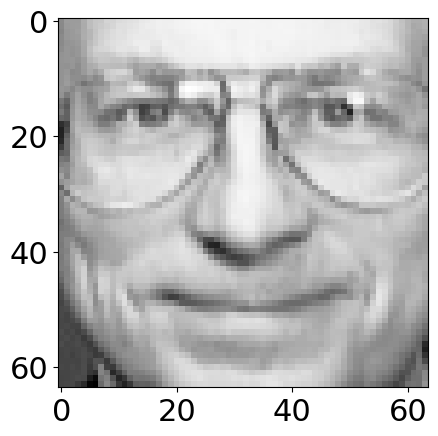

In [111]:
data = pods.datasets.olivetti_glasses()
Y = data['X'] # this data set is set up for classification, but we will model the inputs.
lbls = data['Y']
import matplotlib.cm as cm # import color map
display_index = 0
plt.imshow(np.reshape(Y[display_index, :].flatten(), (64, 64)).T, cmap = cm.Greys_r)
mlai.write_figure("olivetti_faces_data.png", directory="dimred")

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/olivetti_faces_data.png" style="width:60%">

Figure: <i>Data set from Olivetti Research Laboratory of faces.</i>

Note that to display the face we had to reshape the appropriate row of
the data matrix. This is because the images are turned into vectors by
stacking columns of the image on top of each other to form a vector. The
operation

`im = np.reshape(Y[1, :].flatten(), (64, 64)).T`

recovers the original image into a matrix `im` by using the `np.reshape`
function to return the vector to a matrix.}

## Visualizing the Eigenvectors

Each retained eigenvector is stored in the $j$th column of $\mathbf{U}$.
Each of these eigenvectors is associated with particular directions of
variation in the original data. Principal component analysis implies
that we can reconstruct any face by using a weighted sum of these
eigenvectors where the weights for each face are given by the relevant
vector of the latent variables, $\mathbf{ z}_{i, :}$ and the diagonal
elements of the matrix $\mathbf{L}$. We can visualize the eigenvectors
$\mathbf{U}$ as images by performing the same reshape operation we used
to recover the image associated with a data point above. Below we do
this for the first nine eigenvectors of the Olivetti Faces data.

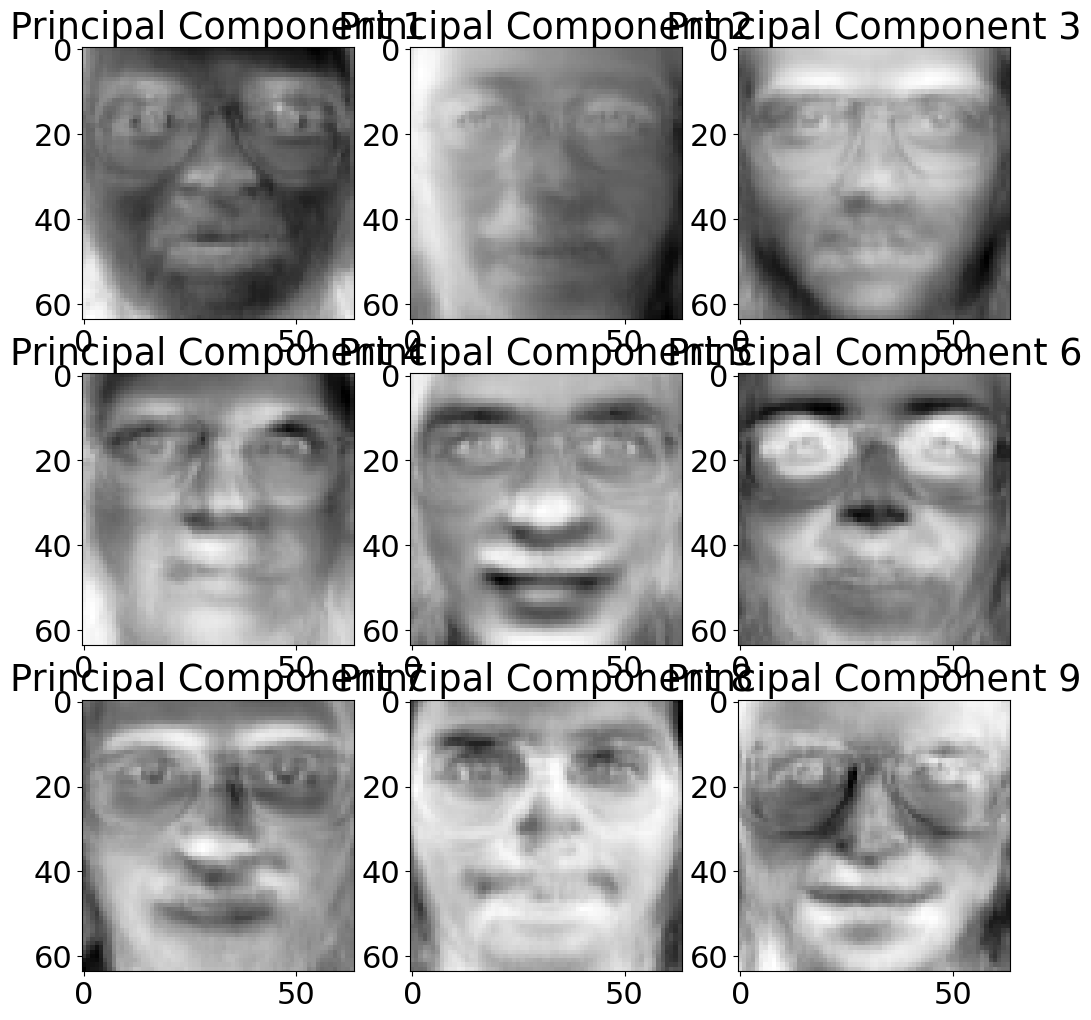

In [112]:
width=3
height=3
q = width*height
fig, ax = plt.subplots(width,height,figsize=(12,12))

U, ell, sigma2 = ppca(Y, q)
lat = 0
for i in range(width):
    for j in range(height):
        ax[i, j].imshow(np.reshape(U[:, lat].flatten(), (64, 64)).T, cmap = cm.Greys_r)
        ax[i, j].set_title('Principal Component ' + str(lat+1))
        lat += 1
mlai.write_figure("dem_olivetti_faces_eigenvectors.png", directory="dimred")

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_olivetti_faces_eigenvectors.png" style="width:60%">

Figure: <i>First 9 eigenvectors of the Olivetti faces data.</i>

## Reconstruction

We can now attempt to reconstruct a given training point from these
eigenvectors. As we mentioned above, the reconstruction is dependent on
the value of the latent variable and the weights from the matrix
$\mathbf{L}$. First let’s compute the value of the latent variables for
the point we want to construct. Then we’ll use them to compute the
weightings of each of the eigenvectors.

In [113]:
mu_x, C_x = posterior(Y, U, ell, sigma2)
reconstruction_weights = mu_x[display_index, :]*ell
print(reconstruction_weights)

[-564.35611393 -397.56348771  -52.62839487  -66.99797262  420.82694874
  -42.65697372  176.30645772 -472.58409873   73.88359261]


This vector of reconstruction weights is applied to the ‘template
images’ given by the eigenvectors to give us our reconstruction. Below
we weight these templates and combine to form the reconstructed image,
and show the comparison to the original image.

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12,6))
ax[0].imshow(np.reshape(Y[display_index, :].flatten(), (64, 64)).T, cmap = cm.Greys_r)
ax[0].set_title('Original Example no ' + str(display_index))
ax[1].imshow(np.reshape(np.dot(U,reconstruction_weights) + Y.mean(axis=0)[None, :], (64, 64)).T, cmap = cm.Greys_r)
ax[1].set_title('Reconstruction of Example from ' + str(len(reconstruction_weights)) + ' Latent Variables')
mlai.write_figure("dem_olivetti_faces_reconstruction.png", directory="dimred")

<img class="" src="https://mlatcl.github.io/advds/./slides/diagrams//dimred/dem_olivetti_faces_reconstruction.png" style="width:60%">

Figure: <i>Reconstruction from the latent space of the faces data.</i>

The quality of the reconstruction is a bit blurry, it can be improved by
increasing the number of template images used (i.e. increasing the
*latent dimensionality*).

## Gene Expression

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_dimred/includes/spellman-eigengenes.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_dimred/includes/spellman-eigengenes.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Each of the cells in your body stores your entire genetic code in your
DNA, but at any one moment it is only ‘expressing’ a small portion of
that code. Your cells are mainly constructed of protein, and these
proteins are manufactured by first transcribing the DNA to RNA and then
translating the RNA to protein. If the DNA is the cells hard drive, then
one role of the RNA is to act like a cache of data that is being read
from the hard drive at any one time. Gene expression arrays allow us to
measure the quantity of different types of RNA in the cell, effectively
analyzing what’s in the cache (although we have to destroy the cell or
the tissue to access it). A gene expression experiment often consists of
a time course or a series of experiments that characterise the gene
expression of cells at any given time.

We will now load in one of the earliest gene expression data sets from a
[1998 paper by Spellman et
al.](http://www.ncbi.nlm.nih.gov/pubmed/9843569), it consists of gene
expression measurements of over six thousand genes in a range of
conditions for brewer’s yeast. The experiment was designed for
understanding the cell cycle of the genes. The expectation is that there
should be oscillating signals inside the cell.

First we extract the principal components of the gene expression.

In [ ]:
import pods

In [ ]:
# load in data and replace missing values with zero
data=pods.datasets.spellman_yeast_cdc15()
Y = data['Y'].fillna(0)
q = 5
U, ell, sigma2 = ppca(Y, q)
mu_x, C_x = posterior(Y, U, ell, sigma2)

Now, looking through, we find that there is indeed a latent variable
that appears to oscilate at approximately the right frequency. The 4th
latent dimension (`index=3`) can be plotted across the time course as
follows.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(mu_x[:, 3])

To reveal an oscillating shape. We can see which genes correspond to
this shape by examining the associated column of $\mathbf{U}$. Let’s
augment our data matrix with this score.

In [ ]:
gene_list = Y.T
gene_list['oscilation'] = np.sqrt(U[:, 3]**2)
gene_list.sort(columns='oscilation', ascending=False).index[:4]

We can look up the first three genes in this list which now ranks the
genes according to how strongly they respond to the fourth latent
dimension. [The NCBI gene database](http://www.ncbi.nlm.nih.gov/gene/)
allows us to search for the function of these genes. Looking at the
function of the four genes that respond most strongly to the third
latent variable they are all genes that encode
[histone](http://en.wikipedia.org/wiki/Histone) proteins. The histone is
thesupport scaffold for the DNA that ensures it folds correctly within
the cell creating the nucleosomes. It seems to make sense that
production of histone proteins should be strongly correlated with the
cell cycle, as when the cell divides it needs to create a large number
of histone proteins for creating the duplicated nucleosomes. The
relevant links giving the descriptions of each gene given here:
[YDR224C](http://www.ncbi.nlm.nih.gov/gene/851810),
[YDR225W](http://www.ncbi.nlm.nih.gov/gene/851811),
[YBL003C](http://www.ncbi.nlm.nih.gov/gene/852283) and
[YNL030W](http://www.ncbi.nlm.nih.gov/gene/855701).

## Further Reading

-   Chapter 7 up to pg 249 of Rogers and Girolami (2011)

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Hastie, T., Stuetzle, W., 1989. Principal curves. Journal of the
American Statistical Association 84, 502–516.

Hotelling, H., 1933. Analysis of a complex of statistical variables into
principal components. Journal of Educational Psychology 24, 417–441.

Lawrence, N.D., 2005. Probabilistic non-linear principal component
analysis with Gaussian process latent variable models. Journal of
Machine Learning Research 6, 1783–1816.

Le Cun, Y., Boser, B.E., Denker, J.S., Henderson, D., Howard, R.E.,
Hubbard, W., Jackel, L.D., 1989. Backpropagation applied to handwritten
zip code recognition. Neural Computation 1, 541–551.
<https://doi.org/10.1162/neco.1989.1.4.541>

Mardia, K.V., Kent, J.T., Bibby, J.M., 1979. Multivariate analysis.
Academic Press, London.

Ng, A.Y., Jordan, M.I., Weiss, Y., n.d. On spectral clustering: Analysis
and an algorithm.

Pearson, K., 1901. On lines and planes of closest fit to systems of
points in space. The London, Edinburgh and Dublin Philosophical Magazine
and Journal of Science, Sixth Series 2, 559–572.

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.

Roweis, S.T., n.d. EM algorithms for PCA and SPCA. pp. 626–632.

Schölkopf, B., Smola, A., Müller, K.-R., 1998. Nonlinear component
analysis as a kernel eigenvalue problem. Neural Computation 10,
1299–1319. <https://doi.org/10.1162/089976698300017467>

Shi, J., Malik, J., 2000. Normalized cuts and image segmentation. IEEE
Transactions on Pattern Analysis and Machine Intelligence 22, 888–905.

Tipping, M.E., Bishop, C.M., 1999b. Mixtures of probabilistic principal
component analysers. Neural Computation 11, 443–482.

Tipping, M.E., Bishop, C.M., 1999a. Probabilistic principal component
analysis. Journal of the Royal Statistical Society, B 6, 611–622.
<https://doi.org/doi:10.1111/1467-9868.00196>